# Named entities

### Imports

In [16]:
import os
import yake

### Load Data

In [12]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

### Choose year 1908

In [13]:
# Keep just the file with the year 1908_
bxl_files = [f for f in files if f.startswith('Bxl_1908')]
len(bxl_files)

16

In [14]:
this_file = bxl_files[0]
this_file

'Bxl_1908_Tome_I1_Part_1.txt'

In [15]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r').read()
text[:500]

'V I L L E\n\nDE\n\nB R U X E L L E S .\no\n\nB U L L E T I N COMMUNAL\nA N N É E\n\nPREMIÈRE\n\nTOME\n\nC O M P T E\n\nR E N D U\n\n1908.\n\nPARTIE.\n\nI.\n\nD E S\n\nS É A N C E S .\n\nBRUXELLES\nTYPOGRAPHIE\n\nET LITHOGRAPHIE\nRue P a c h é c o ,\n12\n\n1908\n\nE . GUYOT\n\n\x0c\x0cN° 1.\n\nC O M P T E R E N D U D E L A SÉANCE D U 2 J A N V I E R 1 9 0 8 .\n\nVILLE D E BRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\nAnnée 1 9 0 8\n\nCONSEIL\nSéance\n\nCOMMUNAL.\n\ndu 2 Janvier 1 9 0 8 .\n\nPrésidence de M . E M I L E D E M O T , Bourgmestre.\n.SOMMAIRE :\n1.\n\nPrestatio'

In [17]:
# Création d'une liste de mots à ignorer
# set([]) dedouble la liste
ignored = set(["conseil communal", "conseil général", "bruxelles", "CONSEIL", "Conseil communal", "COMMUNAL", "BRUXELLES", "VILLE", "Collège", "avis favorable", "Avis favorable"])
ignored

{'Avis favorable',
 'BRUXELLES',
 'COMMUNAL',
 'CONSEIL',
 'Collège',
 'Conseil communal',
 'VILLE',
 'avis favorable',
 'bruxelles',
 'conseil communal',
 'conseil général'}

In [18]:
# Instantier l'extracteur de mots clés
# KeyWord Extractor contiens une fonction
# top = 50 est arbritraire
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [19]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)

In [20]:
keywords

[('CONSEIL', 0.0005190055295925518),
 ('Conseil communal', 0.0005371827975040018),
 ('Collège', 0.0006542736230534695),
 ('Avis favorable', 0.0008532295771922596),
 ('BRUXELLES', 0.0013428162348606814),
 ('Bourgmestre', 0.0013893880236753688),
 ('francs', 0.0014277866313548854),
 ('Messieurs', 0.0014527119545329678),
 ('Janvier', 0.001492993825530437),
 ('VILLE', 0.0015832251039649427),
 ('Section', 0.002548250300960699),
 ("vote d'un crédit", 0.0028020361145525982),
 ('Avis', 0.0028680787104199933),
 ('service', 0.0031840406274842134),
 ('favorable', 0.003264026566498027),
 ("d'un", 0.003373948942731182),
 ("c'est", 0.003461482480440906),
 ("d'un crédit supplémentaire", 0.0035260225260771477),
 ('Conseil général', 0.0036408024912601973),
 ('conditions', 0.004384976302614948),
 ('Budget', 0.004523961495232829),
 ("qu'il", 0.004539109068343577),
 ('Rue', 0.004680787615222225),
 ('Collège vous propose', 0.004825629628751138),
 ('faire', 0.004910841169478875),
 ('Section des finances', 0.

In [21]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2 and kw.lower() not in ignored:
        kept.append(kw)
kept

['Camille Huysmans',
 "d'un crédit",
 'Conseil nomme',
 "vote d'un",
 "d'un Echevin",
 "d'un service",
 "l'Echevin Max"]

In [22]:
for f in sorted(bxl_files)[:16]:
    print(f)
    text = open(os.path.join(data_path, f), 'r').read()
    keywords = kw_extractor.extract_keywords(text.lower())
    kept = []
    for kw, score in keywords:
        words = kw.split()
        # condition pour pouvoir les ajouter dans la liste
        if len(words) == 2 and kw.lower() not in ignored:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

Bxl_1908_Tome_I1_Part_1.txt
Bxl_1908_Tome_I1_Part_1.txt mentions these keywords: d'un crédit, vote d'un, d'un service...
Bxl_1908_Tome_I1_Part_10.txt
Bxl_1908_Tome_I1_Part_10.txt mentions these keywords: ...
Bxl_1908_Tome_I1_Part_11.txt
Bxl_1908_Tome_I1_Part_11.txt mentions these keywords: tramways bruxellois, d'une ligne, travaux publics...
Bxl_1908_Tome_I1_Part_12.txt
Bxl_1908_Tome_I1_Part_12.txt mentions these keywords: tramways bruxellois, d'une école, d'une ligne, dépenses extraordinaires, tarifs ligne, construction d'une...
Bxl_1908_Tome_I1_Part_13.txt
Bxl_1908_Tome_I1_Part_13.txt mentions these keywords: frais d'administration, sous-institutrice primaire, conseiller communal, fonds intercommunal, sous-instituteur primaire, d'autres communes, recettes. dépenses...
Bxl_1908_Tome_I1_Part_2.txt
Bxl_1908_Tome_I1_Part_2.txt mentions these keywords: dépenses ordinaires, suffrage universel, dépenses extraordinaires, recettes ordinaires, loi communale, vote d'un, rue nouvelle...
Bxl_1908

In [23]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rue", "conseil", "college", "collège", 
       "francs", "bruxelles", "art", "bourgmestre", "frais", "communal", "heures", "leurs",
       "saint", "messieurs", "etc", "ceux", "celui"]
sw = set(sw)

In [70]:
# Choisir une année
year = 1908

In [71]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
# Ici en fois de faire un loop, c'est possible de faire une liste 
# year is String dans le txt (I think everithing is string)
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['Bxl_1908_Tome_I1_Part_1.txt',
 'Bxl_1908_Tome_I1_Part_10.txt',
 'Bxl_1908_Tome_I1_Part_11.txt',
 'Bxl_1908_Tome_I1_Part_12.txt',
 'Bxl_1908_Tome_I1_Part_13.txt',
 'Bxl_1908_Tome_I1_Part_2.txt',
 'Bxl_1908_Tome_I1_Part_3.txt',
 'Bxl_1908_Tome_I1_Part_4.txt',
 'Bxl_1908_Tome_I1_Part_5.txt',
 'Bxl_1908_Tome_I1_Part_6.txt',
 'Bxl_1908_Tome_I1_Part_7.txt',
 'Bxl_1908_Tome_I1_Part_8.txt',
 'Bxl_1908_Tome_I1_Part_9.txt',
 'Bxl_1908_Tome_II1_Part_1.txt',
 'Bxl_1908_Tome_II1_Part_2.txt',
 'Bxl_1908_Tome_II1_Part_3.txt']

In [72]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [73]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

16

In [74]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:300]

'V I L L E\n\nDE\n\nB R U X E L L E S .\no\n\nB U L L E T I N COMMUNAL\nA N N É E\n\nPREMIÈRE\n\nTOME\n\nC O M P T E\n\nR E N D U\n\n1908.\n\nPARTIE.\n\nI.\n\nD E S\n\nS É A N C E S .\n\nBRUXELLES\nTYPOGRAPHIE\n\nET LITHOGRAPHIE\nRue P a c h é c o ,\n12\n\n1908\n\nE . GUYOT\n\n\x0c\x0cN° 1.\n\nC O M P T E R E N D U D E L A SÉANCE D U 2 J A N V I '

In [75]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [76]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

'V I L L E\n\nDE\n\nB R U X E L L E S .\no\n\nB U L L E T I N COMMUNAL\nA N N É E\n\nPREMIÈRE\n\nTOME\n\nC O M P T E\n\nR E N D U\n\n1908.\n\nPARTIE.\n\nI.\n\nD E S\n\nS É A N C E S .\n\nBRUXELLES\nTYPOGRAPHIE\n\nET LITHOGRAPHIE\nRue P a c h é c o ,\n12\n\n1908\n\nE . GUYOT\n\n\x0c\x0cN° 1.\n\nC O M P T E R E N D U D E L A SÉANCE D U 2 J A N V I E R 1 9 0 8 .\n\nVILLE D E BRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\nAnnée 1 9 0 8\n\nCONSEIL\nSéance\n\nCOMMUNAL.\n\ndu 2 Janvier 1 9 0 8 .\n\nPrésidence de M . E M I L E D E M O T , Bourgmestre.\n.SOMMAIRE :\n1.\n\nPrestatio'

In [77]:
# Define la fonction clean_text, cherche le contenu du fichier et fait le nettoyage
# Takes de folder content
# Recorre la lista, + grande que 2 letras, no es StopWord y es alfabético
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        # El interés es que WordCloud funciona con 1 string y no con una lista
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [78]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1908_clean.txt!'

In [79]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'première tome partie typographie lithographie guyot séance bulletin année séance janvier présidence sommaire prestation serment installation conseillers élus octobre moons conseiller suppléant communication election quatre échevins composition sections année renvoi comité secret personnel administration communale délégation donnée nomination divers emplois séance ouverte quinze minutes mot lepage echevin lemonnier grimard steens max vandendorne furnemont crick brabandt wauwermans pnttou delbasté'

In [80]:
# Counter hace un diccionario que tiene como key la palabra y como valor la cantidad de veces que aparece la palabra
# Directamente buscando con la key, acceso a los datos de ese registro porque está indexada
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('service', 751), ('place', 613), ('budget', 613), ('dépenses', 592), ('avis', 590), ('section', 588), ('hospices', 556), ('travaux', 549), ('charges', 540), ('cahier', 482)]


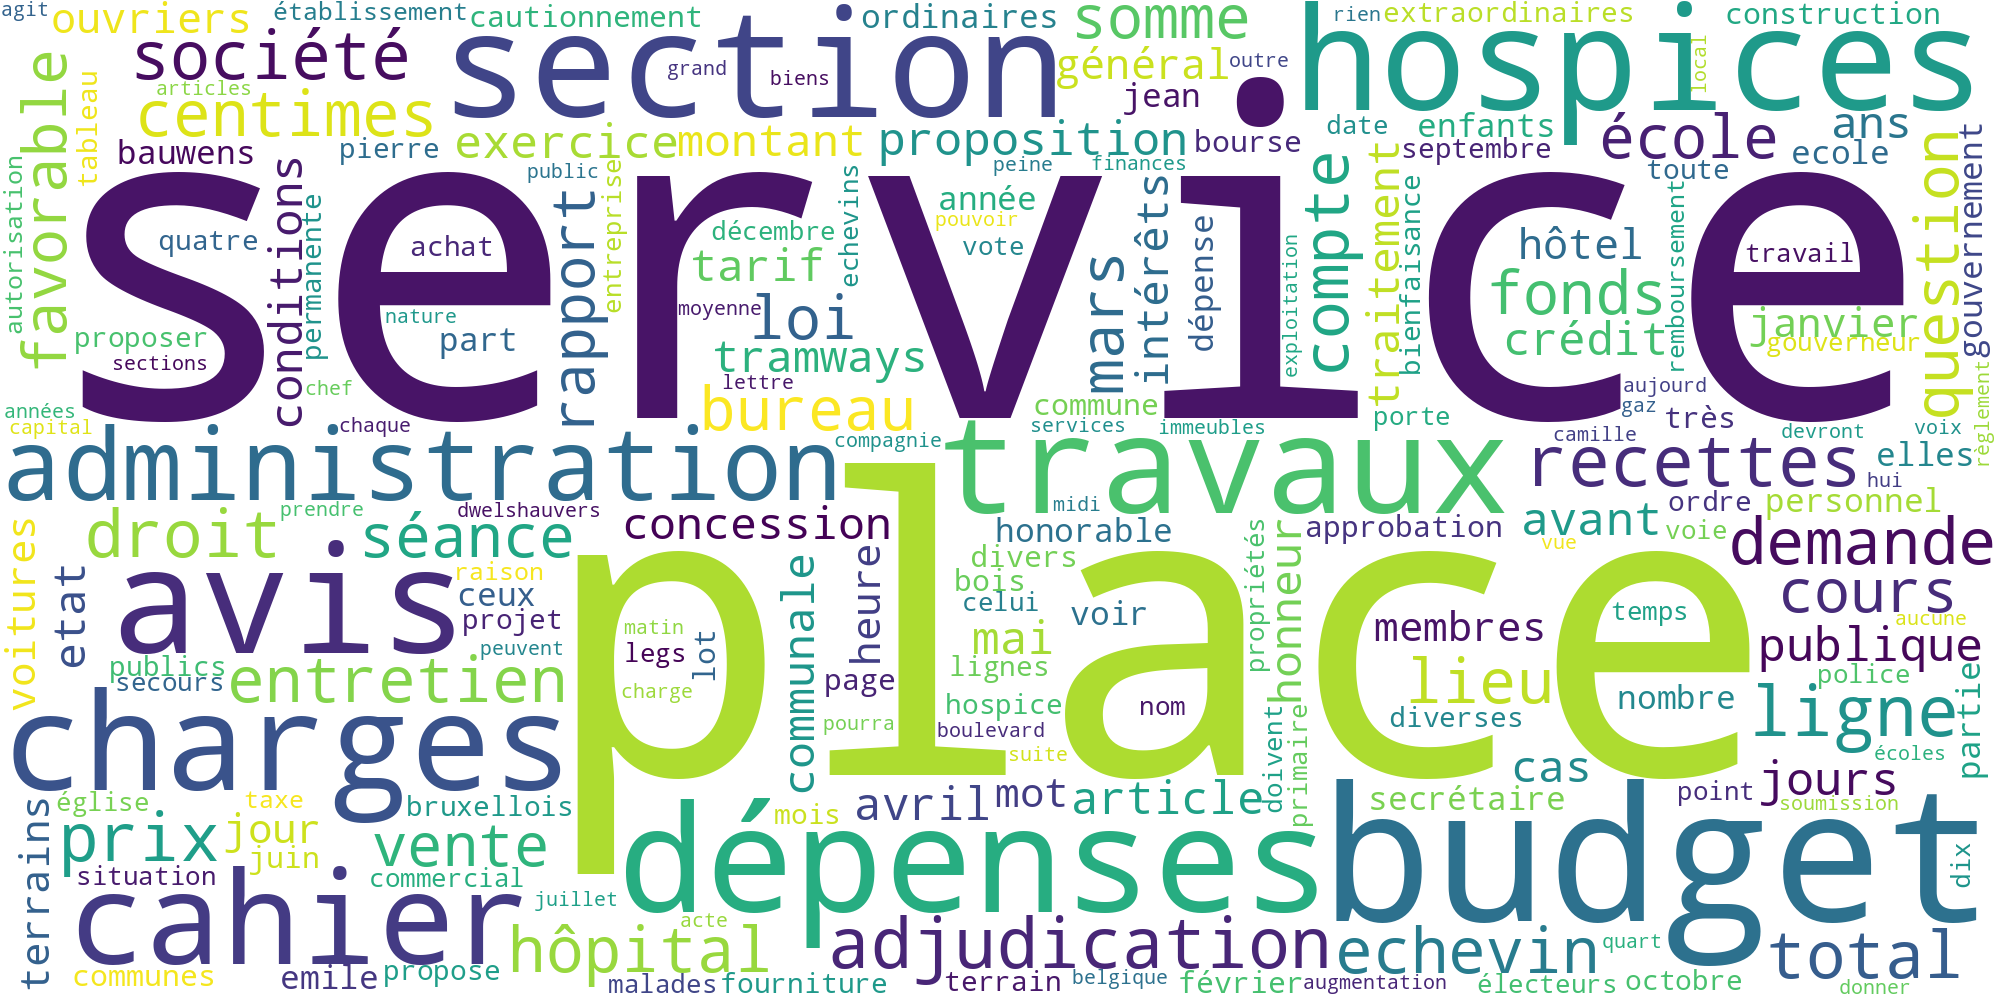

In [81]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# Reconnaissance d'entités nommées avec SpaCy

## Trouver les entités nommées principales (personnes, organisations et lieux) pertinentes pour l'année 1908

### Imports

In [24]:
from collections import defaultdict

import sys
import spacy
from spacy.lang.fr.examples import sentences
import os

In [25]:
nlp = spacy.load('fr_core_news_md')

### Appliquer la reconnaissance d'entités nommées sur l'année 1908 du corpus

In [26]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [27]:
bxl_files_1908 = [f for f in files if f.startswith('Bxl_1908')]

In [28]:
# Loop for geting the text of all the files from 1908
text = ''

for this_file in bxl_files_1908:
    text += open(os.path.join(data_path, this_file), encoding='utf-8').read()

print(text[:500])


V I L L E

DE

B R U X E L L E S .
o

B U L L E T I N COMMUNAL
A N N É E

PREMIÈRE

TOME

C O M P T E

R E N D U

1908.

PARTIE.

I.

D E S

S É A N C E S .

BRUXELLES
TYPOGRAPHIE

ET LITHOGRAPHIE
Rue P a c h é c o ,
12

1908

E . GUYOT

N° 1.

C O M P T E R E N D U D E L A SÉANCE D U 2 J A N V I E R 1 9 0 8 .

VILLE D E BRUXELLES

BULLETIN

COMMUNAL

Année 1 9 0 8

CONSEIL
Séance

COMMUNAL.

du 2 Janvier 1 9 0 8 .

Présidence de M . E M I L E D E M O T , Bourgmestre.
.SOMMAIRE :
1.

Prestatio


In [29]:
%%time
# Traiter le texte

doc = nlp(text[:10000])

CPU times: user 1.5 s, sys: 109 ms, total: 1.61 s
Wall time: 1.66 s


In [30]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    # Acá se puede reemplzar "PER" por "LOC"por ejemplo para testear con otras entidades
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [31]:
# Trier et imprimer
# Acá lo interesante sería mostrar la evolución de los nombres de familia 
sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

Bourgmestre apparait 13 fois dans le corpus
Echevin apparait 13 fois dans le corpus
Grimard apparait 8 fois dans le corpus
Lemonnier apparait 6 fois dans le corpus
Steens apparait 4 fois dans le corpus
Burthoul apparait 4 fois dans le corpus
De Page apparait 4 fois dans le corpus
Jacqmain apparait 4 fois dans le corpus
Scrutin apparait 4 fois dans le corpus
Lepage apparait 3 fois dans le corpus
Hanssens apparait 3 fois dans le corpus
Anspach-Puissant apparait 3 fois dans le corpus
Camille Huysmans apparait 3 fois dans le corpus
Messieurs apparait 3 fois dans le corpus
Conseiller apparait 2 fois dans le corpus
Crick apparait 2 fois dans le corpus
Hubert apparait 2 fois dans le corpus
Bauwens apparait 2 fois dans le corpus
Desmet apparait 2 fois dans le corpus
Vanneck apparait 2 fois dans le corpus
Huisman apparait 2 fois dans le corpus
Delbastée apparait 2 fois dans le corpus
Jules de Trooz apparait 2 fois dans le corpus
Echevins apparait 2 fois dans le corpus
Monsieur le Bourgmestre ap